**Submission Dicoding Klasifikasi Gambar**
---
*   Nama : 'Azzam Naufal Mu'adz
*   Alamat : Jalan Sri Rahayu RT 03 RW 01 Madusari Siman Ponorogo
*   Email : azzamn44@gmail.com

In [1]:
# mengambil dataset rockpaperscissors
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-31 14:20:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.27MB/s    in 52s     

2021-05-31 14:21:37 (5.94 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
# melakukan ekstraksi pada file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
# melakukan install library split-folders
!pip install split-folders

In [4]:
base_dir = '/tmp/rockpaperscissors'

import shutil
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images', ignore_errors=True)

import splitfolders
splitfolders.ratio(base_dir, output=base_dir, ratio=(0.6,0.4))

# membuat variabel untuk direktori train dan validation
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

os.listdir(train_dir)

Copying files: 2188 files [00:00, 4062.72 files/s]


['scissors', 'paper', 'rock']

In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# membuat objek menggunakan Image Generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.4)
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range = 0.2)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [7]:
# membuat model sequential menggunakan Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=25, 
      validation_data=validation_generator, 
      validation_steps=5,
      verbose=2)

Epoch 1/25
25/25 - 49s - loss: 1.0868 - accuracy: 0.4462 - val_loss: 0.9204 - val_accuracy: 0.5688
Epoch 2/25
25/25 - 48s - loss: 0.7566 - accuracy: 0.6875 - val_loss: 0.6307 - val_accuracy: 0.7250
Epoch 3/25
25/25 - 48s - loss: 0.3619 - accuracy: 0.8700 - val_loss: 0.2170 - val_accuracy: 0.9187
Epoch 4/25
25/25 - 47s - loss: 0.2337 - accuracy: 0.9175 - val_loss: 0.3985 - val_accuracy: 0.8625
Epoch 5/25
25/25 - 47s - loss: 0.2355 - accuracy: 0.9225 - val_loss: 0.2101 - val_accuracy: 0.9375
Epoch 6/25
25/25 - 47s - loss: 0.1849 - accuracy: 0.9425 - val_loss: 0.2111 - val_accuracy: 0.9500
Epoch 7/25
25/25 - 48s - loss: 0.1877 - accuracy: 0.9287 - val_loss: 0.2589 - val_accuracy: 0.9312
Epoch 8/25
25/25 - 47s - loss: 0.1489 - accuracy: 0.9438 - val_loss: 0.3139 - val_accuracy: 0.9187
Epoch 9/25
25/25 - 47s - loss: 0.1122 - accuracy: 0.9625 - val_loss: 0.1443 - val_accuracy: 0.9375
Epoch 10/25
25/25 - 47s - loss: 0.1435 - accuracy: 0.9613 - val_loss: 0.3063 - val_accuracy: 0.8813
Epoch 11/

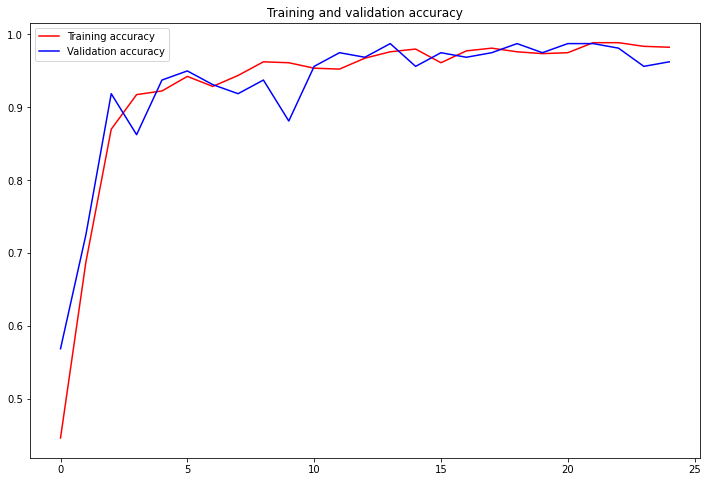

In [10]:
import matplotlib.pyplot as plt

accur = history.history['accuracy']
val_accur = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accur))

plt.figure(figsize=(12,8))
plt.plot(epochs, accur, 'r', label='Training accuracy')
plt.plot(epochs, val_accur, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [11]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


Saving WhatsApp_Image_2021-05-29_at_08.07.47-removebg-preview-removebg-preview.jpg to WhatsApp_Image_2021-05-29_at_08.07.47-removebg-preview-removebg-preview.jpg
WhatsApp_Image_2021-05-29_at_08.07.47-removebg-preview-removebg-preview.jpg
Rock


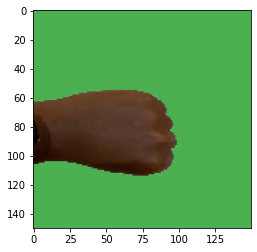

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # memprediksi input gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.argmax(classes)

  print(fn)
  if result == 0:
    print('Paper')
  elif result == 1:
    print('Rock')
  elif result == 2:
    print('Scissors') 

